In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0)) 
rc('font',size=12)

In [2]:
biases = []   #0s
ambientsky = []      #3 sec exposure
ambientlamp = []     #60 sec exposure
neon = []    #60s
helium = []  #60s
sky = []     #3s

for i in range(69,79): 
    biases.append(fits.getdata('nov_7Bias000000{}.fit'.format(i), ext=0).astype(np.int))    

for i in range(79,82):
    ambientsky.append(fits.getdata('nov_7000000{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(82,85):
    ambientlamp.append(fits.getdata('nov_7000000{}.fit'.format(i), ext=0).astype(np.int))

for i in range(85,87):
    neon.append(fits.getdata('nov_7000000{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(87,89):
    helium.append(fits.getdata('nov_7000000{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(89,92):
    sky.append(fits.getdata('nov_7000000{}.fit'.format(i), ext=0).astype(np.int))

In [3]:
avg_bias = np.asarray(biases).mean(axis=0)

ambientsky_sb = [frame - avg_bias for frame in ambientsky]
ambientlamp_sb = [frame - avg_bias for frame in ambientlamp] 
neon_sb = [frame - avg_bias for frame in neon] 
helium_sb = [frame - avg_bias for frame in helium] 
sky_sb = [frame - avg_bias for frame in sky] 

avg_ambientsky = np.asarray(ambientsky_sb).mean(axis=0) 
avg_ambientlamp = np.asarray(ambientlamp_sb).mean(axis=0)

neon_corrected = [i - avg_ambientlamp for i in neon_sb]
helium_corrected  = [i - avg_ambientlamp for i in helium_sb]
sky_corrected = [i - avg_ambientsky for i in sky_sb]

### ARRAYS ARE REVERSED HORIZONTALLY TO MAKE WAVELENGTH GO FROM LOW -> HIGH
avg_neon = np.flip(np.asarray(neon_corrected).mean(axis=0),1)  #np.flip flips the array
avg_helium = np.flip(np.asarray(helium_corrected).mean(axis=0),1)  #axis=1 horizontal
avg_sky = np.flip(np.asarray(sky_corrected).mean(axis=0),1)

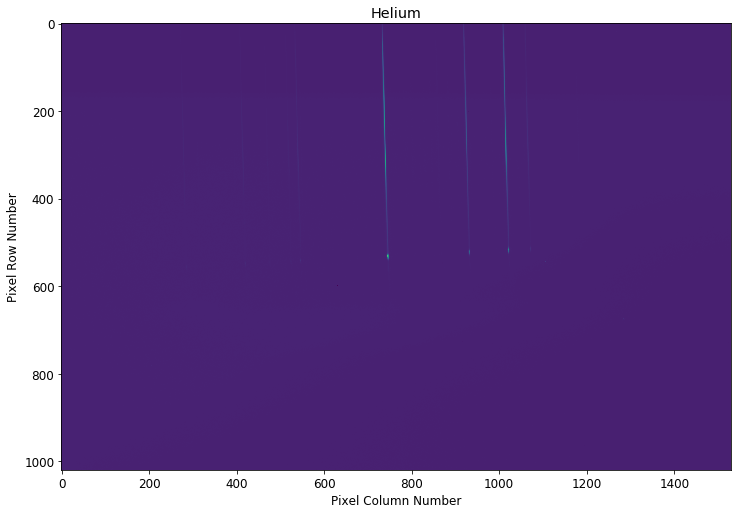

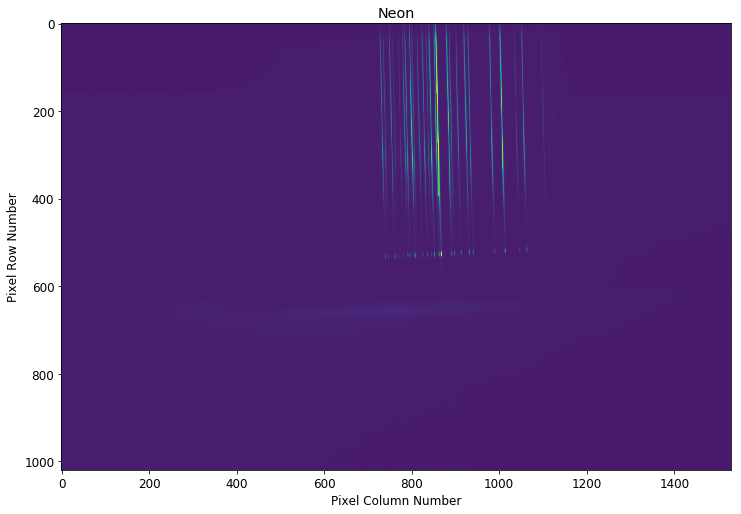

In [4]:
plt.imshow(avg_helium)
plt.title("Helium")
plt.xlabel('Pixel Column Number')
plt.ylabel('Pixel Row Number')
plt.show()

plt.imshow(avg_neon)
plt.title("Neon")
plt.xlabel('Pixel Column Number')
plt.ylabel('Pixel Row Number')
plt.show()

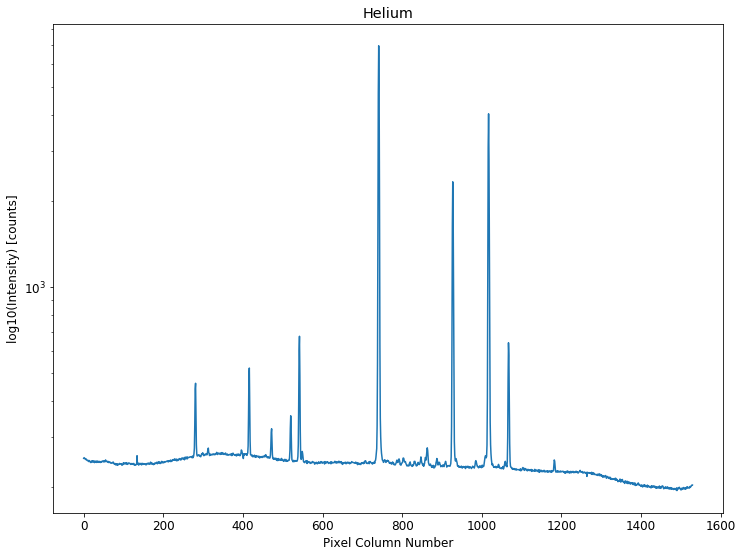

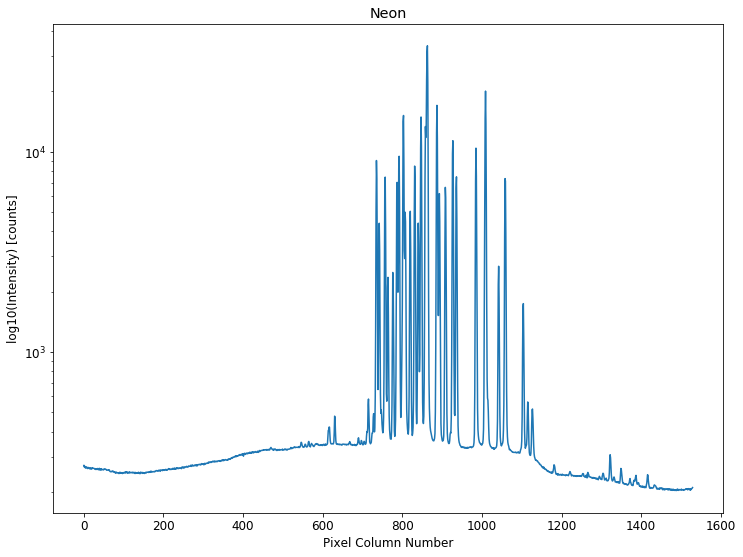

In [5]:
neon_good = np.asarray(avg_neon[300:400,:]).mean(axis=0)
helium_good = np.asarray(avg_helium[300:400,:]).mean(axis=0)

plt.plot(np.arange(len(helium_good)),helium_good)
plt.title("Helium")
plt.yscale('log')
plt.xlabel('Pixel Column Number')
plt.ylabel('log10(Intensity) [counts]')
plt.show()

plt.plot(np.arange(len(neon_good)),neon_good)
plt.title("Neon")
plt.yscale('log')
plt.xlabel('Pixel Column Number')
plt.ylabel('log10(Intensity) [counts]')
plt.show()

The stretch is 0.232 [pixels/angstrom]
This means that there are 4.310344827586206 angstrom per pixel column
The shift is 2680 [angstroms]


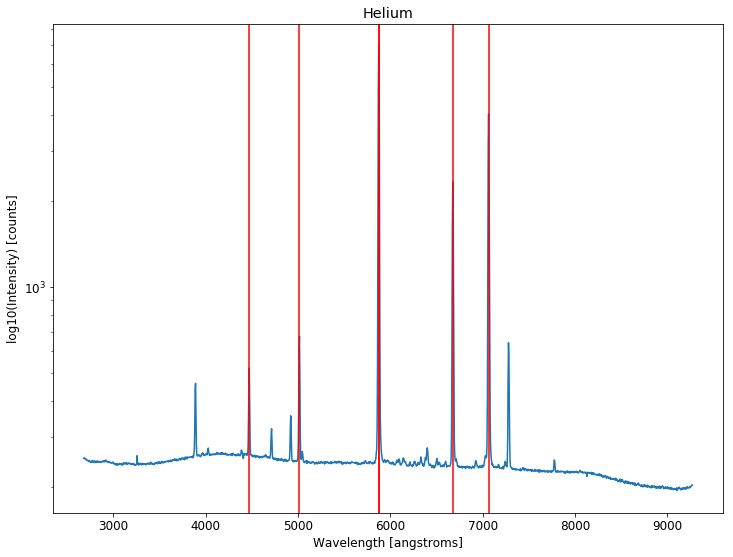

The wavelength and pixel values of each helium line are below:
[4471.4799999999996, 5015.6800000000003, 5875.6199999999999, 5875.9700000000003, 6678.1499999999996, 7065.1899999999996]
[  415.62336   541.87776   741.38384   741.46504   927.5708   1017.36408]


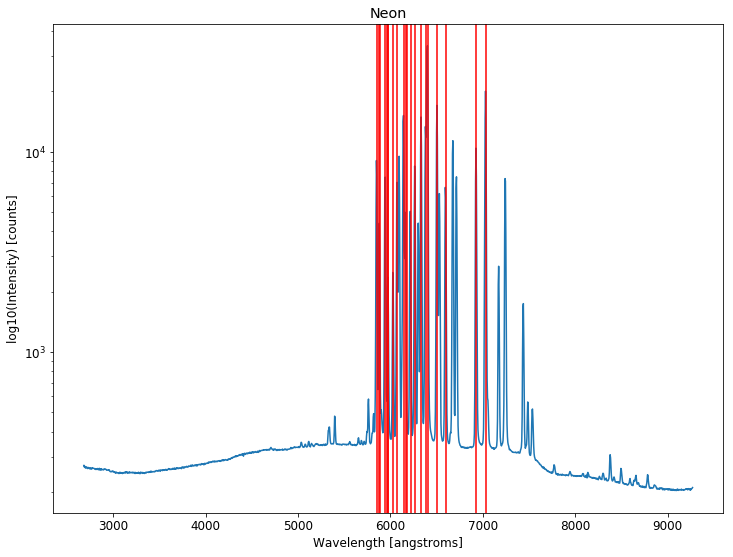

In [6]:
### lines chosen with intensity ≥ 100
### centered around 5600 angstroms

heliumlines_text = np.genfromtxt('helium.txt')
heliumlines = []
for i in range(0,len(heliumlines_text)):
    if heliumlines_text[i,1] >= 100:
        heliumlines.append(heliumlines_text[i,0])

neonlines_text = np.genfromtxt('neon.txt')
neonlines = []
### index[30] range to remove low wavelength lines not detected in spectrum
for i in range(30,len(neonlines_text)):
    if neonlines_text[i,1] >= 100:
        neonlines.append(neonlines_text[i,0])

### trial and error!
stretch = .232   #pixels/angstrom
shift = 2680    #angstroms (abs val)

print("The stretch is",stretch,"[pixels/angstrom]")
print("This means that there are",1/stretch,"angstrom per pixel column")
print("The shift is",shift,"[angstroms]")

plt.plot(np.arange(len(helium_good))/stretch+shift,helium_good)
for line in heliumlines:
    plt.axvline(line,color='r')
plt.title("Helium")
plt.yscale('log')
plt.xlabel('Wavelength [angstroms]')
plt.ylabel('log10(Intensity) [counts]')
plt.show()

heliumlines_pixels = (np.asarray(heliumlines)-shift)*stretch  #angstroms * pixel/angstroms
print("The wavelength and pixel values of each helium line are below:")
print(heliumlines)
print(heliumlines_pixels)

plt.plot(np.arange(len(neon_good))/stretch+shift,neon_good)
for line in neonlines:
    plt.axvline(line,color='r')
plt.title("Neon")
plt.yscale('log')
plt.xlabel('Wavelength [angstroms]')
plt.ylabel('log10(Intensity) [counts]')
plt.show()

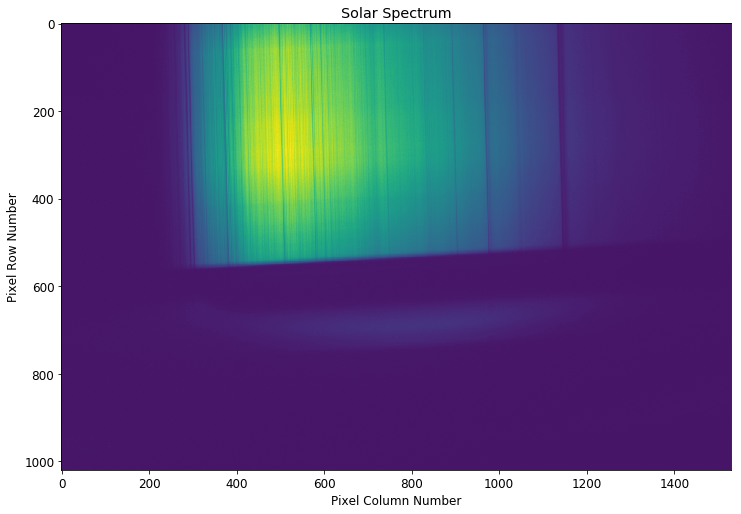

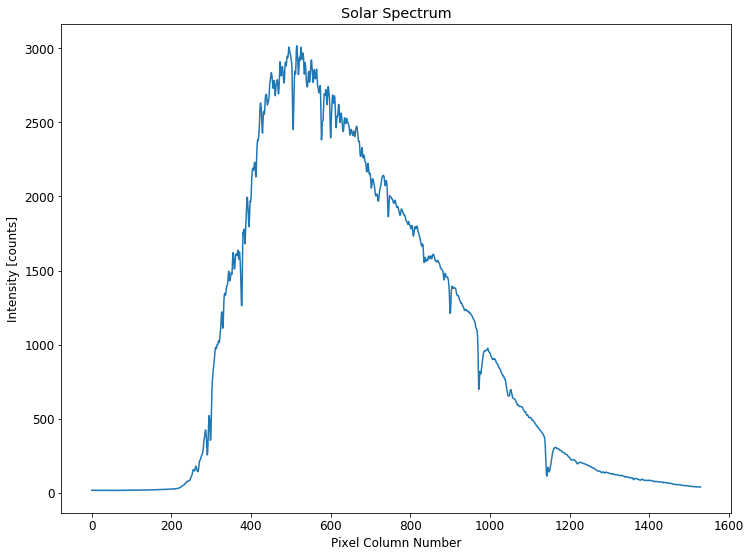

In [7]:
plt.imshow(avg_sky)
plt.title("Solar Spectrum")
plt.xlabel('Pixel Column Number')
plt.ylabel('Pixel Row Number')
plt.show()

sky_good = np.asarray(avg_sky[300:400,:]).mean(axis=0)

plt.plot(np.arange(len(sky_good)),sky_good)
plt.title('Solar Spectrum')
plt.xlabel('Pixel Column Number')
plt.ylabel('Intensity [counts]')
plt.show()

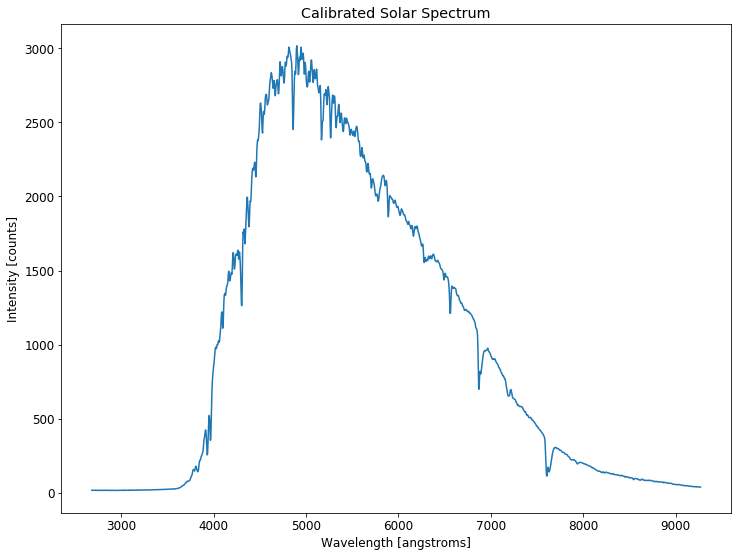

In [8]:
wavelength = np.arange(len(sky_good))/stretch + shift
spectra = np.vstack((wavelength,sky_good)).T

plt.plot(spectra[:,0],spectra[:,1])
plt.title('Calibrated Solar Spectrum')
plt.xlabel('Wavelength [angstroms]')
plt.ylabel('Intensity [counts]')
plt.show()

In [9]:
### used to find indices of wavelength ranges
### [b,E,D] = [5170,5270,5890] from wikipedia
for i in range(550,750):
    print(i,":", spectra[i])

550 : [ 5050.68965517  2875.75333333]
551 : [ 5055.    2917.33]
552 : [ 5059.31034483  2921.23      ]
553 : [ 5063.62068966  2879.56666667]
554 : [ 5067.93103448  2840.92333333]
555 : [ 5072.24137931  2804.59666667]
556 : [ 5076.55172414  2770.28333333]
557 : [ 5080.86206897  2783.72666667]
558 : [ 5085.17241379  2833.78666667]
559 : [ 5089.48275862  2856.57666667]
560 : [ 5093.79310345  2825.60333333]
561 : [ 5098.10344828  2796.81      ]
562 : [ 5102.4137931  2795.02     ]
563 : [ 5106.72413793  2814.85333333]
564 : [ 5111.03448276  2850.31333333]
565 : [ 5115.34482759  2859.28      ]
566 : [ 5119.65517241  2812.76666667]
567 : [ 5123.96551724  2754.88      ]
568 : [ 5128.27586207  2737.86666667]
569 : [ 5132.5862069  2728.75     ]
570 : [ 5136.89655172  2704.17      ]
571 : [ 5141.20689655  2699.15333333]
572 : [ 5145.51724138  2719.04666667]
573 : [ 5149.82758621  2744.75      ]
574 : [ 5154.13793103  2748.72      ]
575 : [ 5158.44827586  2665.44666667]
576 : [ 5162.75862069  2503.

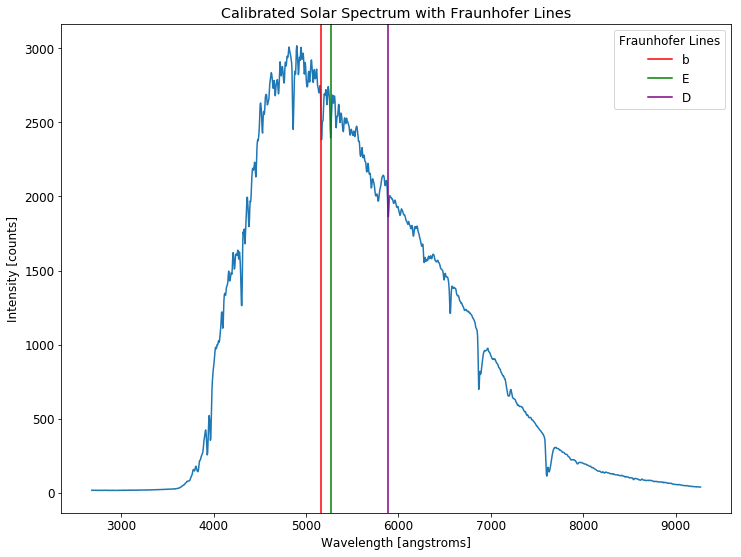

b = [ 5167.06896552] angstroms
E = [ 5266.20689655] angstroms
D = [ 5891.20689655] angstroms


In [10]:
b = spectra[np.where(spectra == spectra[560:590].min()),0][0]
E = spectra[np.where(spectra == spectra[590:610].min()),0][0]
D = spectra[np.where(spectra == spectra[730:750].min()),0][0]

fraunhofer = [b,E,D]

plt.plot(spectra[:,0],spectra[:,1])
plt.axvline(fraunhofer[0],color='r',label = 'b')
plt.axvline(fraunhofer[1],color='g',label = 'E')
plt.axvline(fraunhofer[2],color='purple',label='D')
plt.title('Calibrated Solar Spectrum with Fraunhofer Lines')
plt.xlabel('Wavelength [angstroms]')
plt.ylabel('Intensity [counts]')
plt.legend(title='Fraunhofer Lines')
plt.show()

print("b =",b,"angstroms")
print("E =",E,"angstroms")
print("D =",D,"angstroms")